In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

# DATA CLEANING

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar.value_counts()

Time        US_dollar
1999-01-04  1.1789       1
2015-10-06  1.1224       1
2015-10-20  1.1373       1
2015-10-19  1.1333       1
2015-10-16  1.1360       1
                        ..
2007-05-08  1.3558       1
2007-05-07  1.3615       1
2007-05-04  1.3561       1
2007-05-03  1.3613       1
2024-04-11  1.0729       1
Length: 6535, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


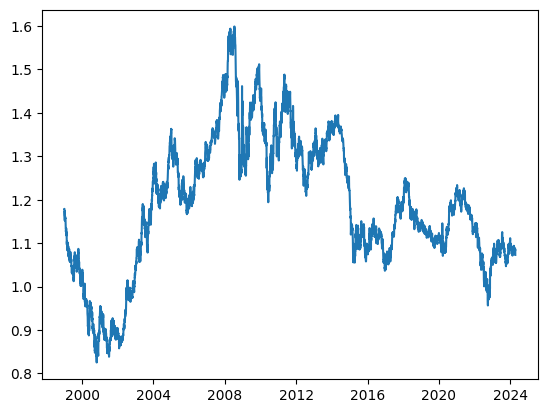

In [7]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()